# Birthday problem

## Objective

* Find the probability of at least 2 people were born on the same date during the year
* This means the same day and month
* There are k people in the room


## Solution

* Easier approach is to calculate 2 people who _don't_ share the same birthday
* Final probability = 1 - P(not on same day)
* To calculate P(not on same day) you use conditional proababilty
* Example with three people:
  * Probability of first person having a birthday = 1
  * Probability of second person to not share the same birthday = 364/365
  * Probability of third person to not share the same birthday with the previous two people = 363/365

In [1]:
# Core libraries
import numpy as np
import math
import random

# Data visualization
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Functions

In [2]:
def birthday_probability(k):
    CP = math.factorial(365) / (math.factorial(365-k) * 365**k)
    P = 1 - CP
    return round(P*100, 2)


def simulation_of_birthday_problem(k, num_iteration):
    days = np.arange(1, 366, 1).tolist()  # list of numbers from 1 to 365
    count_same_day = 0
    for i in range(num_iteration):
        birthdays = [0] * k  # list of zeros of length 

        for person in range(0, k):
            birthdays[person] = random.choice(days) # we save in the list randomly generated birthday for each person

        if len(set(birthdays)) < len(birthdays):  # we are checking whether we pull two same birthdays (i.e. same days)
            count_same_day+=1

    return round(100 * (count_same_day / num_iteration), 2)

## Birthday match

Probability of 2 people having the same birthday (day and month) in a room of k people.

In [3]:
k = 23
print(f"Probability of {k} people in the same room having the same birthday is {birthday_probability(k)}%")

Probability of 23 people in the same room having the same birthday is 50.73%


## Run Monte Carlo simulation

In [5]:
print("Running Monte Carlo simulation using a run of 10000...")
print(f"Probability of 2 people in the same room having the same birthday is {simulation_of_birthday_problem(k=2, num_iteration=10000)}%")
print(f"Probability of 3 people in the same room having the same birthday is {simulation_of_birthday_problem(k=3, num_iteration=10000)}%")


Running Monte Carlo simulation using a run of 10000...
Probability of 2 people in the same room having the same birthday is 0.33%
Probability of 3 people in the same room having the same birthday is 0.88%


In [7]:
probabilities = []
iterations = np.arange(1, 100000, 50).tolist()  # list of numbers from 1 to 100000 with step size of 50 [1, 51, 101, ...]

for iter_ in iterations:
    result = simulation_of_birthday_problem(k=2, num_iteration=iter_)
    probabilities.append(result)

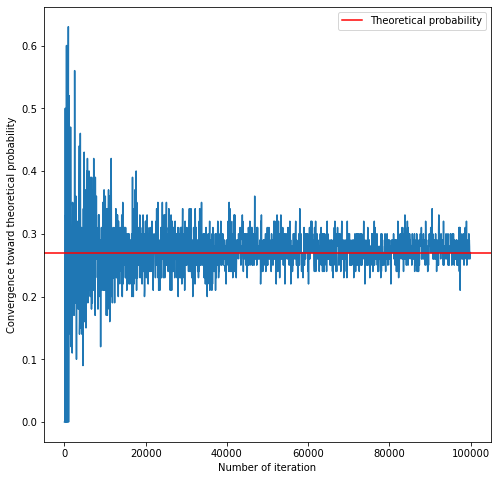

In [8]:
# Show results
plt.figure(figsize=(8,8))
plt.plot(iterations, probabilities)

plt.axhline(0.27, label='Theoretical probability', color='red')
plt.xlabel('Number of iteration')
plt.ylabel('Convergence toward theoretical probability')
plt.legend();